In [ ]:
"""
항목집합 = {i1, ..., ,in} = 2의 n승 부분집합-1(공집합)
2의 n승-1개 부분집합으로부터 연관규칙 생성(임계값 설정)
"""

In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder #머신러닝을 위한 확장형 패키지
from mlxtend.frequent_patterns import apriori

#TransactionEncoder: 길이가 일정치 않은 거래 데이터를 머신러닝하기에 적절한 형태의 배열로 변환

In [15]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [16]:
te=TransactionEncoder()

In [21]:
te_array = te.fit_transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [11]:
te_array.astype(int) #불린형이 아닌 int형으로 나타내기

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [12]:
te.columns_ 

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [23]:
#te_array -> 데이터프레임 변환, 컬럼 이름은 te.colums_설정
pd.DataFrame(te_array, columns=te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [25]:
te.inverse_transform(te_array) #원래 형태로 돌리기

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [ ]:
# 머신러닝을 위한 데이터 프레임으로 변환 - 실습

In [27]:
dataset2 = [['사과', '치즈', '생수'],
           ['생수', '딸기', '치즈', '고등어'],
           ['수박', '사과', '생수'],
           ['생수', '딸기', '치즈', '감자']]

In [30]:
te2 = TransactionEncoder()
te2_array = te2.fit_transform(dataset2)

In [33]:
df = pd.DataFrame(te2_array, columns=te2.columns_)
df

,감자,고등어,딸기,사과,생수,수박,치즈
0,False,False,False,True,True,False,True
1,False,True,True,False,True,False,True
2,False,False,False,True,True,True,False
3,True,False,True,False,True,False,True


In [ ]:
#apriori알고리즘

In [37]:
freq_itemsets = apriori(df, min_support=0.5, use_colnames=True) 
#최소지지도가  0.5이상인 것만 추출(빈발항목집합)

freq_itemsets

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(생수, 딸기)"
5,0.50,"(딸기, 치즈)"
6,0.50,"(생수, 사과)"
7,0.75,"(생수, 치즈)"
8,0.50,"(생수, 딸기, 치즈)"


In [39]:
from mlxtend.frequent_patterns import association_rules #연관규칙을 찾아내는 함수

In [43]:
association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)
#metric: 평가지표
#min_threshold(임계값): confidence(신뢰도)가 0.3이상인 것 모두 추출
"""
conviction: Y없이 X가 발생한 비율 (찾아낸 규칙이 얼마나 잘못되었는지를 확인)
            (Y가 발생되지 않은 비율) / (X와 Y와 동시에 일어나지 않은 사건) -> 비율의 몇 배인가
conv(X->Y) = (1-s(Y)) / (1-c(X->Y))

(1-c(X->Y)) = (s(x)-s(x∪Y)) / s(X)
(1-s(Y)) = Y가 발생하지 않은 비율

예> 웹문서
conv(코딩->파이썬): 전체 웹 문서에서 코딩이 없는 비율의 매우 높을 것이다
                    파이썬이 있는 문서에서 코딩이 없는 문서는 그다지 많지 않을 것이다
                    따라서, cov(코딩 -> 파이썬)은 1보다 매우 큰 값을 갖게 될 것이다.
                    따라서, 코딩과 파이썬의 상관 관계는 매우 높을 것이다.
"""

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(생수, 딸기)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(생수, 치즈)",(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


In [ ]:
# 뉴스 데이터 : 속리산 -> ???
# 깃대종 관련 논문 : 속리산 -> ???
# 속리산 -> 담비 규칙의 (지지도, 신뢰도, 향상도)

# ...1시부터 2시 사이 자느라 못들음.... 채워넣기
***

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [5]:
#dataset -> 데이터프레임 생성
#pd.DataFrame(dataset)
te=TransactionEncoder()
teArray=te.fit(dataset).transform(dataset)
df=pd.DataFrame(teArray, columns=te.columns_)
df
#최소 지지도가 0.6 이상인 항목집합을 출력하시오
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [6]:
fre_itemsets=apriori(df, min_support=0.6, use_colnames=True)
fre_itemsets
# support          itemsets           length
# 0.8               (Eggs)               1
# 0.8   	(Kidney Beans, Eggs)         2

fre_itemsets['length']=fre_itemsets['itemsets'].apply(lambda x:len(x))
fre_itemsets
# len(fre_itemsets.loc[1].itemsets)
# len(fre_itemsets.loc[10].itemsets)


#length가 2이면서 support가 0.8 이상인  항목 집합을 모두 출력하시오.
fre_itemsets[(fre_itemsets['length']==2) & (fre_itemsets['support']>=0.8)]

,support,itemsets,length
5,0.8,"(Kidney Beans, Eggs)",2


In [7]:
fre_itemsets[fre_itemsets['itemsets']=={'Onion', 'Eggs'}]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


In [8]:
#Sparse 형태로 표현하여 메모리 낭비 해소
ohtArray=te.fit(dataset).transform(dataset, sparse=True)
ohtArray

sparsedf=pd.DataFrame.sparse.from_spmatrix(ohtArray, columns=te.columns_)
sparsedf

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,0,0,0,1,0,True,1,1,1,0,1
1,0,0,1,1,0,True,0,1,1,0,1
2,1,0,0,1,0,True,1,0,0,0,0
3,0,1,0,0,0,True,1,0,0,1,1
4,0,1,0,1,1,True,0,0,1,0,0


In [13]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

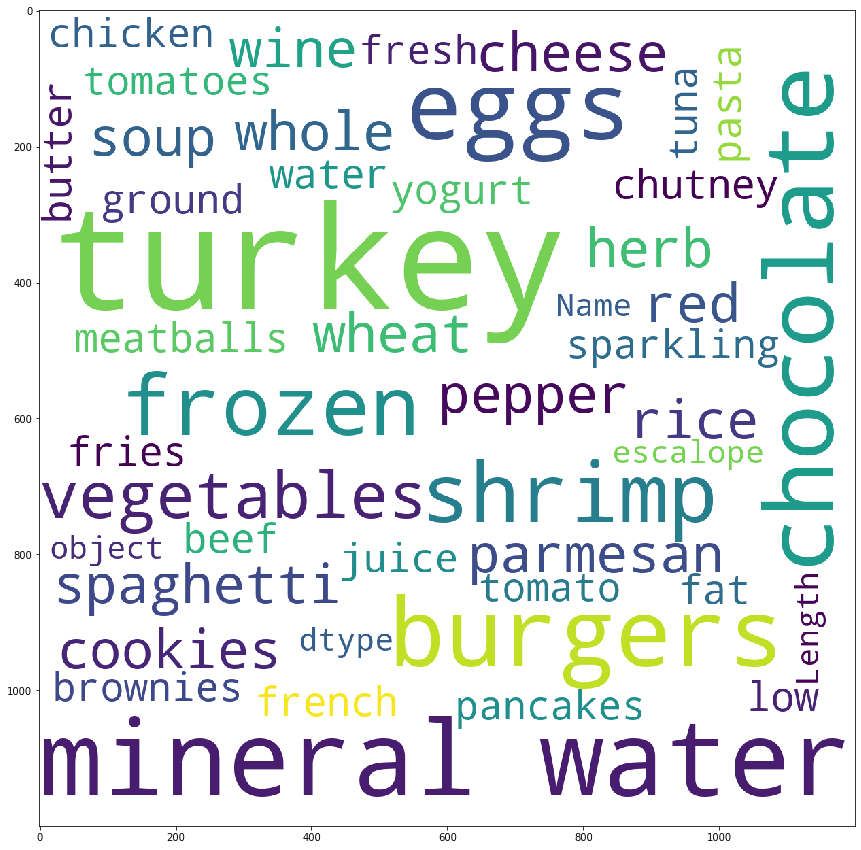

In [7]:
plt.rcParams['figure.figsize'] = (15, 15) #그림 크기(가로, 세로) 인치 단위
wordcloud = WordCloud(background_color='white', width=1200, 
                      height=1200, max_words=120).generate(str(data[0]))
plt.imshow(wordcloud)

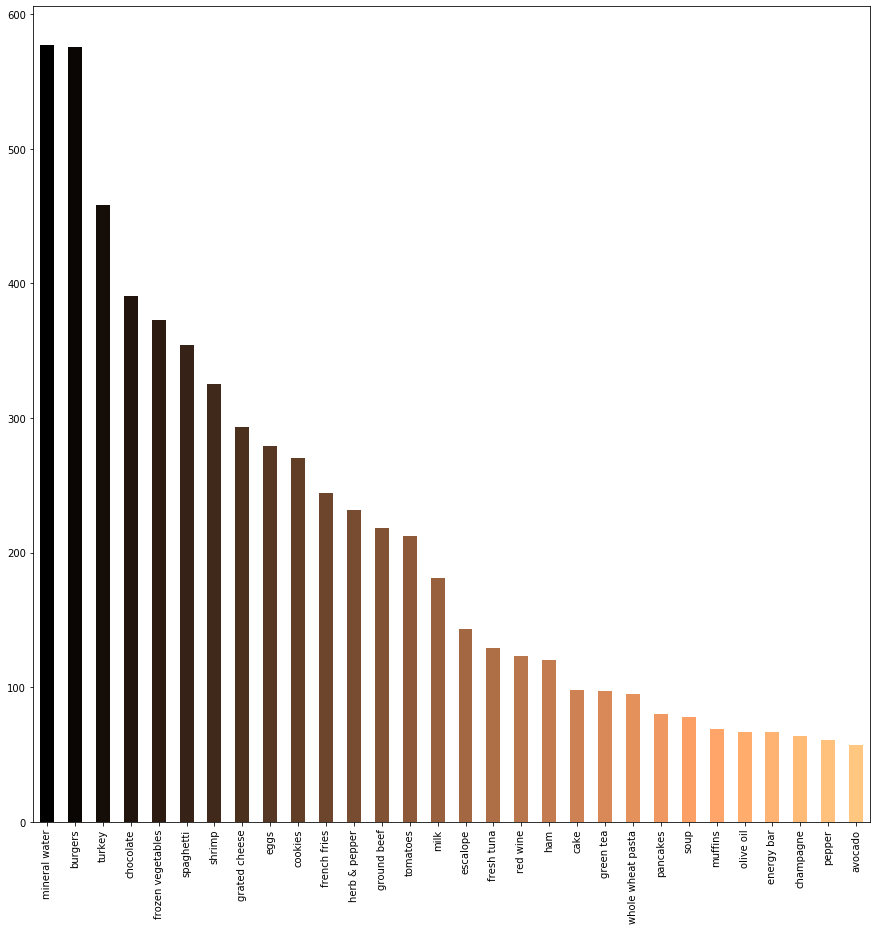

In [16]:
data[0].value_counts().head(30).plot.bar(color=plt.cm.copper(np.linspace(0,1,30)))

In [ ]:
"""
groceries.csv
market.csv

연관규칙(지지도, 신뢰도, 향상도)
-> 의미있는 번들 상품 아이템 검색
-> 특정 고객에게 홍보하기


예) {돼지고기, 후추} -> {상추} 향상도:2
input: 구매했던 상품을 입력하세요? 돼지고기
output: 추천하고 싶은 상품은 상추입니다.
"""

In [28]:
pd.read_csv("groceries.csv", sep="\t")

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese ,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
5,rolls/buns
6,"other vegetables,UHT-milk,rolls/buns,bottled b..."
7,pot plants
8,"whole milk,cereals"
9,"tropical fruit,other vegetables,white bread,bo..."


In [2]:
import pandas as pd
pd.__version__

'1.1.2'